In [4]:
from final_functions import *

### Información que tiene el decoder

Por ahora voy a suponer que el decoder cuenta con:

-flow_x

-flow_y

-huffman_codebook

-frame_dimensions

-reference_frame

-message

In [5]:

folder_path = '/Users/diegosilveracoeff/Desktop/Fing/DCM/Lana_Lucho' #Cambiar por path de trabajo

flow_x_path = os.path.join(folder_path, 'flow_x.npy')
flow_y_path = os.path.join(folder_path, 'flow_y.npy')
symbols_path = os.path.join(folder_path, 'symbols.npy')
codes_path = os.path.join(folder_path, 'codes.npy')
#frame_dim = np.array([480,864])
#frame_dim = np.array([864,480])
frame_dim = np.array([1280,960])
ref_image_path = os.path.join(folder_path, 'frame_32.tif')
message_path = os.path.join(folder_path, 'message.bin')

In [6]:
#Cargo symbols y codes
symbols = np.load(symbols_path)
codes = np.load(codes_path)

message = read_bin_file(message_path)
#print(type(message))

decoded_file = decode_symbols_2(message, symbols, codes)
#print(decoded_file.shape)

Primeros 8 bits: 00000010
Número entero: 2
80375
(7, 1020)


In [7]:
decoded_file_list = []
print(decoded_file)
for element in decoded_file:
    decoded_file_list.append(eval(element))
decoded_file_array = np.array(decoded_file_list)
ordered_list = reconstruct_array(decoded_file_array, frame_dim[0]*frame_dim[1])

print(ordered_list)
print(len(ordered_list))

['(0, 1030)' '(7, 1030)' '(7, 1020)' ... '(2, 10)' '(947, -10)' '(0, 10)']
[1030    0    0 ...    0    0    0]
1228800


In [8]:
print(frame_dim[0]*frame_dim[1])
full_array = complete_with_zeros(ordered_list, frame_dim[0]*frame_dim[1])
full_array_reshaped = full_array.reshape(frame_dim)
print(full_array_reshaped.shape)

1228800
(1280, 960)


In [9]:
idct_path = os.path.join(folder_path, 'IDCT.tif')
decoded_residual = idct_2(full_array_reshaped,idct_path)

In [10]:
print(decoded_residual.shape)
decoded_residual = decoded_residual.reshape(frame_dim)
print(decoded_residual.shape)

(1280, 960)
(1280, 960)


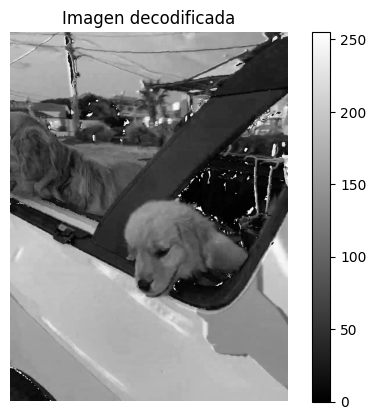

In [11]:
#Pruebo obtener la imagen final, voy a probar primero usando directamente el frame con motion compensation
#mc: motion_compensation

mc_ref_path = os.path.join(folder_path, 'corrected_reference.tif')
mc_ref_image = cv2.imread(mc_ref_path, cv2.IMREAD_GRAYSCALE)
idct_image_16bits_int_list = [np.round(value) for value in decoded_residual]
idct_image_16bits_int_array = np.array(idct_image_16bits_int_list)
idct_image_16bits = idct_image_16bits_int_array.astype(np.int16)
idct_image_8bits = idct_image_16bits_int_array.astype(np.uint8)
decoded_image = mc_ref_image + idct_image_8bits - 128

#mc_ref_image = mc_ref_image.astype(np.int16)
#decoded_image = mc_ref_image + idct_image_16bits_int_array
#decoded_image = decoded_image.astype(np.int16)

decoded_image_path = os.path.join(folder_path, 'decoded_image.tif')
cv2.imwrite(decoded_image_path, decoded_image, [cv2.IMWRITE_TIFF_COMPRESSION, 1])

plt.imshow(decoded_image, cmap='gray', vmin=0, vmax=np.max(decoded_image))
plt.colorbar()
plt.title('Imagen decodificada')
plt.axis('off')  # Ocultar ejes
plt.show()